In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

In [13]:
import pandas as pd
import re
import numpy as np
import math

In [95]:
t = np.array(['sca']).astype('object')
t[0]

'sca'

In [96]:
t

array(['sca'], dtype=object)

In [26]:
path = './data/data_with_time_series.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 30)

In [27]:
pid = 408602
print(df.loc[df['手术ID'] == pid,'实施手术'])
series = df.loc[df['手术ID'] == pid,'SPO2']
idx = series.index[0]
data = series[idx]
# data = re.split(r'\s+',data.strip())
print(data)

94    [左]股骨颈内固定取出术
Name: 实施手术, dtype: object
98 -100 -100 -100 -100 -100 -100 -100 89 -100 98 98 98 98 98 98 96 97 98 98 98 97 97 96 97 97 97 96 96 97 97 98 98 98 97 96 97 97 97 97 96 96 98 98 97 96 97 97 98 97 99 -102 -102 -102 -102 -102 -102 -102 -102 98 99 -102 -102 98 -102 98 98 98 99 98 98 98 98 98 98 98 98 98 98 98 99 99 99 99 100 100 100 99 100 100 100 100 100 100 100 100 97 94 100 99 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 99 100 99 100 100 100 100 100 100 100 100 100 99 100 96 97 98 98 89 95 92 93 93 94 94 94 94 97 95 92 95 92 92 93 94 94 92 94 93 94 94 94 92 93 93 95 94 94 96 96 96 95 94 96 95 95 95 94 94 94 95 94 95 95 94 92 93 94 94 93 93 93 93 93 94 93 93 93 91 86 95 94 94 95 96 94 94 97 96 96 98 98 100 99 95 98 96 98 98 98 98 99 98 96 98 96 97 95 97 98 97 96 97 98 99 98 96 97 96 97 97 98 99 99 99 99 97 98 99 98 99 99 99 97 97 97 100 99 98 99 99 97 99 100 99 99 98 97 98 98 99 99 98 99 98 97 97 97 98 97 97 98 100


In [9]:
def toNumberList(s):
    return [float(char) for char in s.split(' ')]

def expandList(arr):
    ans = [-100] * 10
    ans.extend(arr)
    ans.extend([-100] * 5)
    return ans

# 通过移动平均法进行插值
def interpolation(s):
    arr = toNumberList(s)
    length = len(arr)
    ans = []
    for idx,val in enumerate(arr):
        if val > 0:
            ans.append(str(val))
        else:
            l = idx
            r = idx
            left = 0
            right = 0
            while l >= 0:
                if arr[l] > 0:
                    left = arr[l]
                    break
                else:
                    l -= 1
            while r < length:
                if arr[r] > 0:
                    right = arr[r]
                    break
                else:
                    r += 1
            ans.append(str(round((left + right) / 2,1)))
    return ' '.join(ans)

In [6]:
def zero_feature(s):
    length = len(s.split(' '))
    if length < 10:
        return ' '.join(['0','0','0','0','0','0','0','0','0','0'])
    else:
        return s

# 将字符串序列变为数字序列
def toNumberList(s):
    return [float(c) for c in s.split(' ')] 

# 返回一个数字组成的序列
def minus_to_zero(s):
    arr = toNumberList(s)
    ans = []
    for num in arr:
        if num < 0:
            ans.append(0)
        else:
            ans.append(num)
    return ans

# 变换时间序列(以字符串的形式输入)，是异常值标记为1，不是异常值标记为0
def trans_arr(s,col_name):
    arr = minus_to_zero(s)
    ans = []
    if col_name == 'NBPSYS' or col_name == 'NBPSYS_inter':
        for val in arr:
            if val >= 140 or val <= 90:
                ans.append(1)
            else:
                ans.append(0)
    if col_name == 'NBPDIA' or col_name == 'NBPDIA_inter':
        for val in arr:
            if val >= 90 or val <= 60:
                ans.append(1)
            else:
                ans.append(0)
    if col_name == 'PR' or col_name == 'PR_inter':
        for val in arr:
            if val >= 100 or val <= 60:
                ans.append(1)
            else:
                ans.append(0)
    if col_name == 'SPO2' or col_name == 'SPO2_inter':
        for val in arr:
            if  val <= 95:
                ans.append(1)
            else:
                ans.append(0)
    return ans
        

def feature_select(s,col_name):
    arr = trans_arr(s,col_name)
    length = len(arr)
    ans = []
    if length <= 10:
        return zero_feature(s)
    step = math.floor(length / 10)
    
    cnt = 1
    for idx in range(0,length,step):
        if cnt == 10:
            step_arr = arr[idx:length]
        else:
            step_arr = arr[idx:idx+step]
        step_val = sum(step_arr)
        ans.append(str(step_val))
        if cnt == 10:
            break
        cnt += 1
    return ' '.join(ans)

In [28]:
data_inter = interpolation(data)

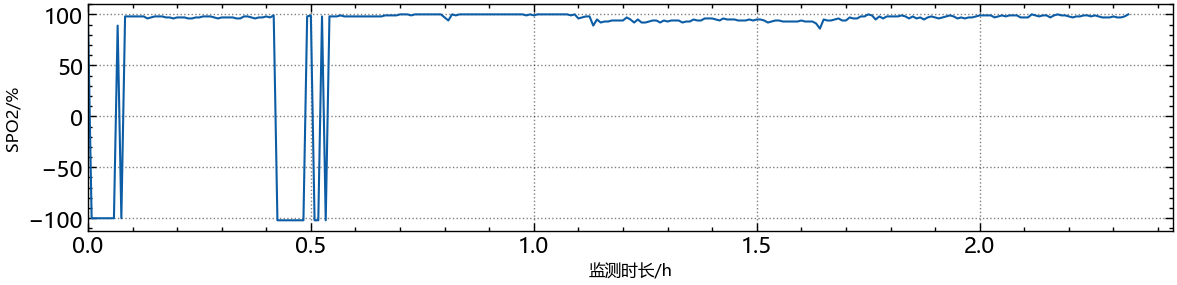

In [30]:
data1 = toNumberList(data)
# data2 = expandList(data1)
x = np.arange(0,len(data1)) / 120
with plt.style.context(['science','grid','notebook']):
    fig = plt.figure(figsize=(14,3),dpi=100)
#     plt.ylim([0,1])
    plt.xlim([0,x[-1]+0.1])
    plt.plot(x,data1,linewidth=1.5)
    
    plt.ylabel('SPO2/%',fontdict={'size':12})
#     plt.xticks(size="12",rotation=90)
    plt.xlabel(r'监测时长/h',fontdict={'size':12})
#     plt.legend(loc='upper left',prop={'size':12})
#     plt.axis('tight')
#     plt.savefig('./chart/perplexity.jpg')
    plt.show()

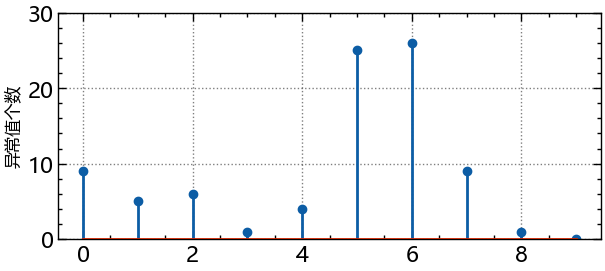

In [37]:
data_fe = toNumberList(feature_select(data,'SPO2'))
# x = np.arange(0,len(data_fe)) / 120
with plt.style.context(['science','grid','notebook']):
    fig = plt.figure(figsize=(7,3),dpi=100)
    plt.ylim([0,30])
#     plt.xlim([0,x[-1]+0.1])
    plt.stem(data_fe)
    
    plt.ylabel('异常值个数',fontdict={'size':12})
#     plt.xticks(size="12",rotation=90)
#     plt.xlabel(r'监测时长/h',fontdict={'size':12})
#     plt.legend(loc='upper left',prop={'size':12})
#     plt.axis('tight')
#     plt.savefig('./chart/perplexity.jpg')
    plt.show()

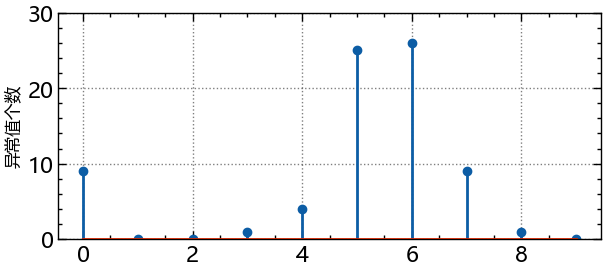

In [38]:
data_fe = toNumberList(feature_select(data_inter,'SPO2'))
# x = np.arange(0,len(data_fe)) / 120
with plt.style.context(['science','grid','notebook']):
    fig = plt.figure(figsize=(7,3),dpi=100)
    plt.ylim([0,30])
#     plt.xlim([0,x[-1]+0.1])
    plt.stem(data_fe)
    
    plt.ylabel('异常值个数',fontdict={'size':12})
#     plt.xticks(size="12",rotation=90)
#     plt.xlabel(r'监测时长/h',fontdict={'size':12})
#     plt.legend(loc='upper left',prop={'size':12})
#     plt.axis('tight')
#     plt.savefig('./chart/perplexity.jpg')
    plt.show()

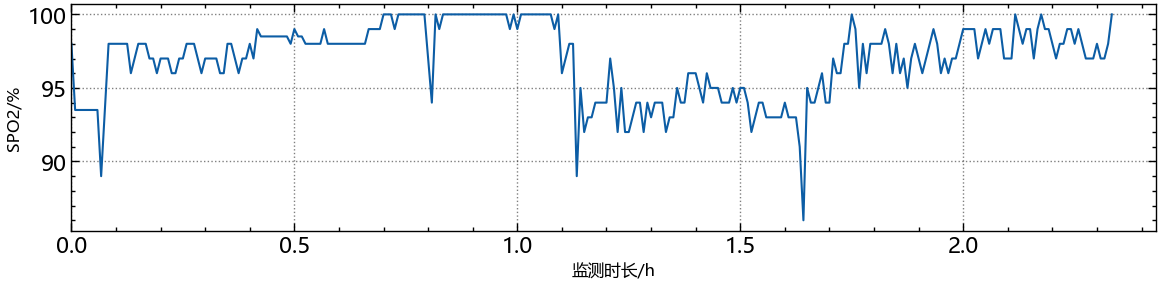

In [36]:
data1 = toNumberList(data_inter)
# data2 = expandList(data1)
x = np.arange(0,len(data1)) / 120
with plt.style.context(['science','grid','notebook']):
    fig = plt.figure(figsize=(14,3),dpi=100)
#     plt.ylim([0,100])
    plt.xlim([0,x[-1]+0.1])
    plt.plot(x,data1,linewidth=1.5)
    
    plt.ylabel('SPO2/%',fontdict={'size':12})
#     plt.xticks(size="12",rotation=90)
    plt.xlabel(r'监测时长/h',fontdict={'size':12})
#     plt.legend(loc='upper left',prop={'size':12})
#     plt.axis('tight')
#     plt.savefig('./chart/perplexity.jpg')
    plt.show()